# Importing Libraries

In [1]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Input, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensordash.tensordash import Tensordash

# GPU Configuration

In [2]:
config=ConfigProto()
config.gpu_options.allow_growth=True
sess=InteractiveSession(config=config)

# Dataset

## Loading

In [3]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

## Preprocessing

In [4]:
ohe=OneHotEncoder(sparse=False)
ytrain=ohe.fit_transform(ytrain.reshape((-1,1)))
ytest=ohe.transform(ytest.reshape((-1,1)))
names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
xtrain=xtrain.reshape((-1,28,28,1))/255.0
xtest=xtest.reshape((-1,28,28,1))/255.0

# Analysis

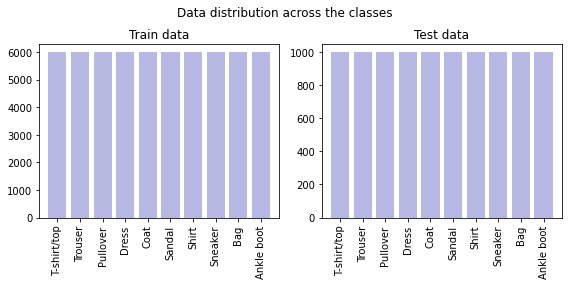

In [6]:
n1=np.sum(ytest,axis=0)
n2=np.sum(ytrain, axis=0)
c=np.arange(0,n1.shape[0])
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(122)
ax1.bar(c,n1,color="#b8b8e5")
ax1.set_xticks(c)
ax1.set_xticklabels(names, rotation=90)
ax1.set_xlim((-0.8,n1.shape[0]-0.2))
ax1.set_title("Test data")
ax2=fig.add_subplot(121)
ax2.bar(c,n2,color="#b8b8e5")
ax2.set_xticks(c)
ax2.set_xticklabels(names, rotation=90)
ax2.set_xlim((-0.8,n2.shape[0]-0.2))
ax2.set_title("Train data")
plt.tight_layout()
fig.suptitle("Data distribution across the classes")
fig.subplots_adjust(top=0.85)
plt.savefig('resources/data_analysis.png',dpi=300)
plt.show()

## Visualization

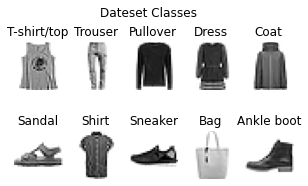

In [7]:
fig=plt.figure(figsize=(5,3))
for i in range(len(names)):
    ax=fig.add_subplot(2,5,i+1)
    ax.set_title(names[i])
    ax.axis('off')
    temp=random.randint(0,xtrain[ytrain[:,i]==1].shape[0]-1)
    ax.imshow(np.uint8(255*(1-xtrain[ytrain[:,i]==1][temp].reshape((28,28)))),cmap='gray')
fig.suptitle("Dateset Classes")
plt.savefig("resources/dataclass.png",dpi=300)
plt.show()

# Model Definition

In [8]:
def model():
    inp=Input(shape=(28,28,1))

    x=Conv2D(64, 3, padding='same', activation='relu')(inp)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)

    x=Conv2D(128, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)

    x=Conv2D(256, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)

    x=Conv2D(512, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization()(x)

    x=Flatten()(x)
    x=Dense(256, activation='relu')(x)
    x=Dropout(0.2)(x)
    x=Dense(256, activation='relu')(x)
    x=Dropout(0.2)(x)
    x=Dense(10, activation='softmax')(x)
    return Model(inp, x)

In [9]:
m=model()
m.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512   

# Callbacks

In [10]:
tdash=Tensordash(ModelName="Fashion MNIST", email="sagnik106@gmail.com")

# Training

In [11]:
with tf.device("/gpu:0"):
    history=m.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data=(xtest, ytest), callbacks=[tdash])

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.3942 - accuracy: 0.8597 - val_loss: 0.2959 - val_accuracy: 0.8938
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2576 - accuracy: 0.9065 - val_loss: 0.2904 - val_accuracy: 0.8921
Epoch 3/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2215 - accuracy: 0.9200 - val_loss: 0.2519 - val_accuracy: 0.9078
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1908 - accuracy: 0.9303 - val_loss: 0.2494 - val_accuracy: 0.9129
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1660 - accuracy: 0.9391 - val_loss: 0.4431 - val_accuracy: 0.8579
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1508 - accuracy: 0.9448 - val_loss: 0.2631 - val_accuracy: 0.9166
Epoch 7/10
938/938 [==============================] - 12s 12ms/step - loss: 0.1287 - accuracy: 0.9541 - val_loss: 0.2460 - val_accuracy:

# Model Performance

In [12]:
histories=history.history

## Saving the performance history

In [13]:
f=open("resources/log.json", "w")
json.dump(histories, f)
f.close()

## Loading the performance history

In [14]:
f=open("resources/log.json", "r")
histories=json.load(f)
f.close()

## Visualization

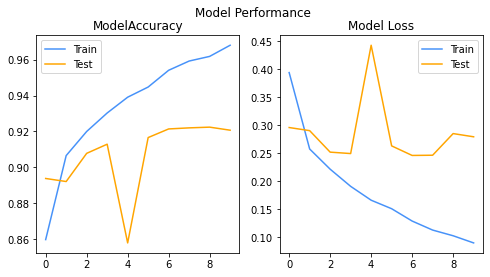

In [15]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(122)
ax1.plot(histories["loss"], color='#4792f9', label="Train")
ax1.plot(histories["val_loss"], color='#ffa500', label="Test")
ax1.set_title("Model Loss")
ax1.legend()
ax2=fig.add_subplot(121)
ax2.plot(histories["accuracy"], color='#4792f9', label="Train")
ax2.plot(histories["val_accuracy"], color='#ffa500', label="Test")
ax2.legend()
ax2.set_title("ModelAccuracy")
fig.suptitle("Model Performance")
fig.savefig("resources/performance.png",dpi=300)

# Saving the model

In [16]:
m.save("model.h5")